In [51]:
import numpy as np
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Twitch Social Networks

In [52]:
df = pd.read_csv('./musae_ENGB_edges.csv')
df.head()

,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [53]:
# Create an undirected graph
G = nx.from_pandas_edgelist(df, source='from', target='to', create_using=nx.Graph())

In [54]:
#If the below code runs in your laptop then do please get the pic of the graph
# nx.draw(G)

In [56]:
print('Total no. of edges =', G.number_of_edges())
print('Total no. of nodes =', G.number_of_nodes())

Total no. of edges = 35324
Total no. of nodes = 7126


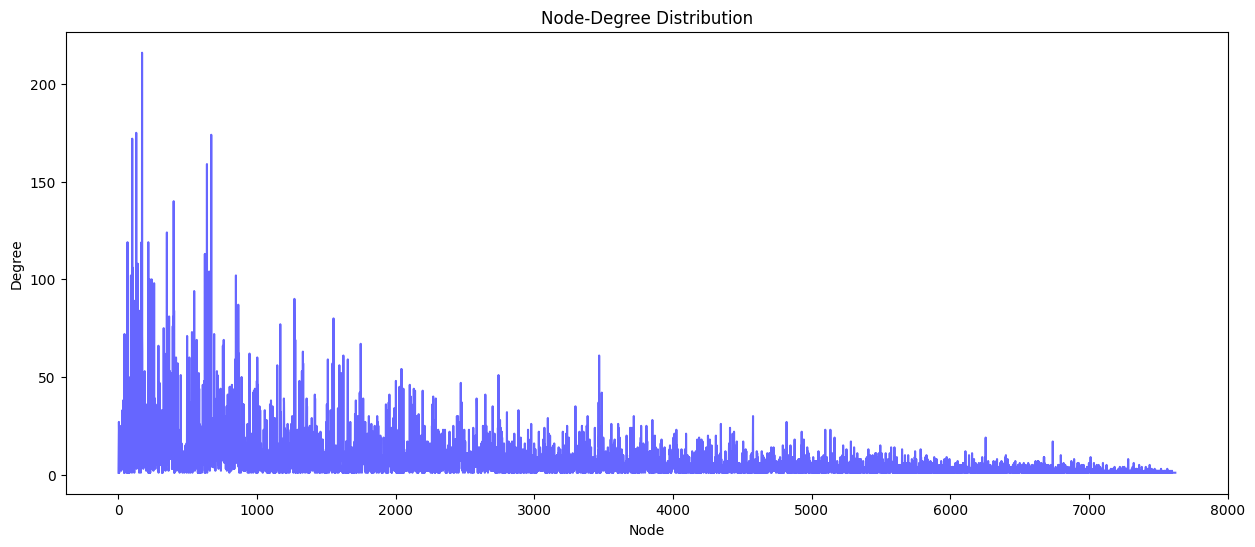

In [58]:
derees = [G.degree(node) for node in G.nodes()]
plt.figure(figsize=(15, 6))
plt.plot(degrees, color = 'b', alpha = 0.6)
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Node-Degree Distribution")
plt.show()

In [59]:

def plot_degree_distribution(G):
    degrees = [G.degree(node) for node in G.nodes()]
    plt.figure(figsize=(10, 6))
    plt.xticks(np.arange(0, 400, 20))
    plt.xlim(0, 400)
    plt.hist(degrees, bins=60, color = 'b', alpha = 0.6)
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.title("Degree Distribution")
    plt.show()
    
    # Find max and min degree
    max_degree = max(degrees)
    min_degree = min(degrees)

    # Calculate average degree
    avg_degree = np.mean(degrees)

    # Calculate standard deviation of the degree distribution
    std_dev = np.std(degrees)

    print("Max Degree:", max_degree)
    print("Min Degree:", min_degree)
    print("Average Degree:", avg_degree)
    print("Standard Deviation of Degree Distribution:", std_dev)


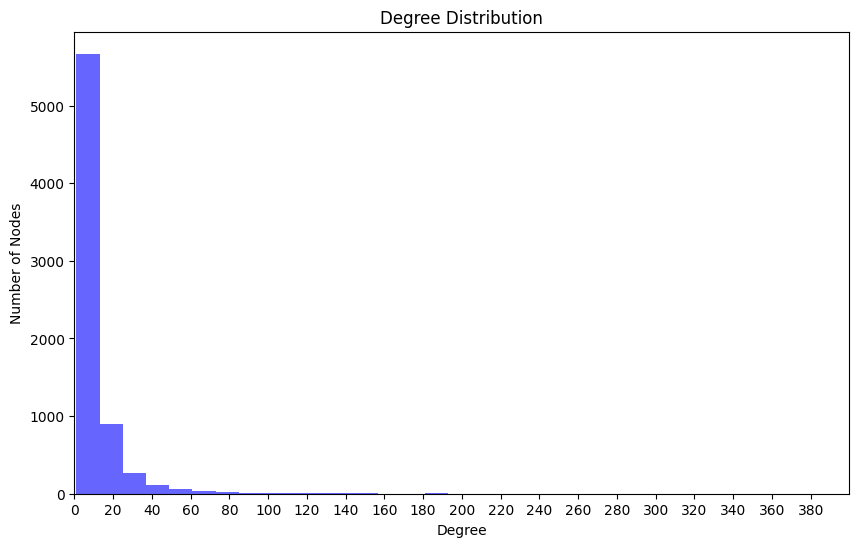

Max Degree: 720
Min Degree: 1
Average Degree: 9.914117316867808
Standard Deviation of Degree Distribution: 22.18870615557688


In [60]:
plot_degree_distribution(G)

In [61]:

def degree_centrality(G):
    # Degree centrality
    degree_centrality = nx.degree_centrality(G)
    plt.figure(figsize=(10,6))
    plt.xticks(np.arange(-0.004, 0.04, 0.002), rotation = 60)
    plt.xlim(-0.004, 0.04)
    sns.kdeplot(degree_centrality, fill=True,color='orange')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('Degree Centrality Distribution')

    # Extract the node IDs and their corresponding degree centralities
    nodes = list(degree_centrality.keys())
    centralities = list(degree_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.plot(centralities, color='orange', alpha = 0.7)
    plt.title('Degree Centrality bar Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Degree Centrality')
    plt.show()

    # Create a dataframe from degree centrality
    plt.figure(figsize=(10, 6))
    plt.xticks(np.arange(-0.003, 0.015, 0.001), rotation=60)
    sns.violinplot(x=centralities, fill=True,color='orange', alpha = 0.5)
    plt.title('Degree Centrality')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Density')
    plt.xlim(-0.003, 0.015)
    plt.show()
    
    return degree_centrality


In [62]:
def eigen_centrality(G):
    # Eigenvalue centrality
    eigen_centrality = nx.eigenvector_centrality(G)

    plt.figure(figsize=(10,6))
    plt.xticks(np.arange(-0.02, 0.20, 0.01), rotation = 60)
    plt.xlim(-0.02, 0.2)
    sns.kdeplot(list(eigen_centrality.values()), fill=True,color='g')
    plt.xlabel('Eigenvalue Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('Eigenvalue Centrality Distribution')
    plt.show()

    eigen_centrality = nx.eigenvector_centrality(G)
    # Extract the node IDs and their corresponding eigenvalue centralities
    nodes = list(eigen_centrality.keys())
    centralities = list(eigen_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.plot(centralities, color='g', alpha=0.7)  
    plt.title('Eigenvalue Centrality bar Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Eigenvalue Centrality')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(nodes)), centralities, color='g', alpha=0.5)
    plt.title('Eigenvalue Centrality Scatter Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Eigenvalue Centrality')
    plt.show()

    return eigen_centrality

In [63]:
def katz_centrality(G):
    # Katz centrality
    katz_centrality = nx.katz_centrality_numpy(G,alpha=0.1)
    
    plt.figure(figsize=(10,6))
    sns.kdeplot(list(katz_centrality.values()), fill=True,color='b')
    plt.xlabel('Katz Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('Katz Centrality Distribution')
    plt.show()

    # Extract the node IDs and their corresponding katz centralities
    nodes = list(katz_centrality.keys())
    centralities = list(katz_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.plot(centralities, color='b', alpha=0.7)
    plt.title('Katz Centrality bar Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Katz Centrality')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(nodes)), centralities, color='b', alpha=0.5)
    plt.title('Katz Centrality Scatter Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Katz Centrality')
    plt.show()
    return katz_centrality

In [64]:
def pagerank_centrality(G):
    # PageRank centrality
    pagerank_centrality = nx.pagerank(G)

    plt.figure(figsize=(10,6))
    plt.xticks(np.arange(-0.0005, 0.004, 0.0002), rotation = 60)
    plt.xlim(-0.0005, 0.004)
    sns.kdeplot(list(pagerank_centrality.values()), fill=True,color='red')
    plt.xlabel('PageRank Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('PageRank Centrality Distribution')
    plt.show()

    # Extract the node IDs and their corresponding pagerank centralities
    nodes = list(pagerank_centrality.keys())
    centralities = list(pagerank_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.plot(centralities, color='red', alpha=0.7)
    plt.title('PageRank Centrality bar Plot')
    plt.xlabel('Node Index')
    plt.ylabel('PageRank Centrality')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(nodes)), centralities, color='red', alpha=0.5)
    plt.title('PageRank Centrality Scatter Plot')
    plt.xlabel('Node Index')
    plt.ylabel('PageRank Centrality')
    plt.show()
    return pagerank_centrality

In [65]:
def betweenness_centrality(G):
    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G,k=1000)

    plt.figure(figsize=(10,6))
    plt.xticks(np.arange(-0.005, 0.02, 0.0015), rotation = 60)
    plt.xlim(-0.005, 0.02)
    sns.kdeplot(list(betweenness_centrality.values()), fill=True,color='g')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('Betweenness Centrality Distribution')
    plt.show()

    # Extract the node IDs and their corresponding betweenness centralities
    nodes = list(betweenness_centrality.keys())
    centralities = list(betweenness_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.plot(centralities, color='g', alpha=0.6)
    plt.title('Betweenness Centrality bar Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Betweenness Centrality')
    plt.show()

    # Plot scatter plot for betweenness centrality
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(nodes)), centralities, color='g', alpha=0.5)
    plt.title('Betweenness Centrality Scatter Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Betweenness Centrality')
    plt.show()
    return betweenness_centrality

In [66]:
def closeness_centrality(G):
    # Closeness centrality
    closeness_centrality = nx.closeness_centrality(G)

    plt.figure(figsize=(10, 6))
    sns.kdeplot(list(closeness_centrality.values()), fill=True,color='m')
    plt.xlabel('Closeness Centrality')
    plt.ylabel('Density of Nodes')
    plt.title('Closeness Centrality Distribution')
    plt.show()

    # Extract the node IDs and their corresponding closeness centralities
    nodes = list(closeness_centrality.keys())
    centralities = list(closeness_centrality.values())

    # Plot scatter plot for closeness centrality
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(nodes)), centralities, color='m', alpha=0.4)
    plt.title('Closeness Centrality Scatter Plot')
    plt.xlabel('Node Index')
    plt.ylabel('Closeness Centrality')
    plt.show()
    return closeness_centrality

In [67]:
def calculate_all_centrality_measures(G):
    centrality_measures = {}
    centrality_measures['degree_centrality'] = degree_centrality(G)
    centrality_measures['eigen_centrality'] = eigen_centrality(G)
    centrality_measures['katz_centrality'] = katz_centrality(G)
    centrality_measures['pagerank_centrality'] = pagerank_centrality(G)
    centrality_measures['betweenness_centrality'] = betweenness_centrality(G)
    centrality_measures['closeness_centrality'] = closeness_centrality(G)
    return centrality_measures


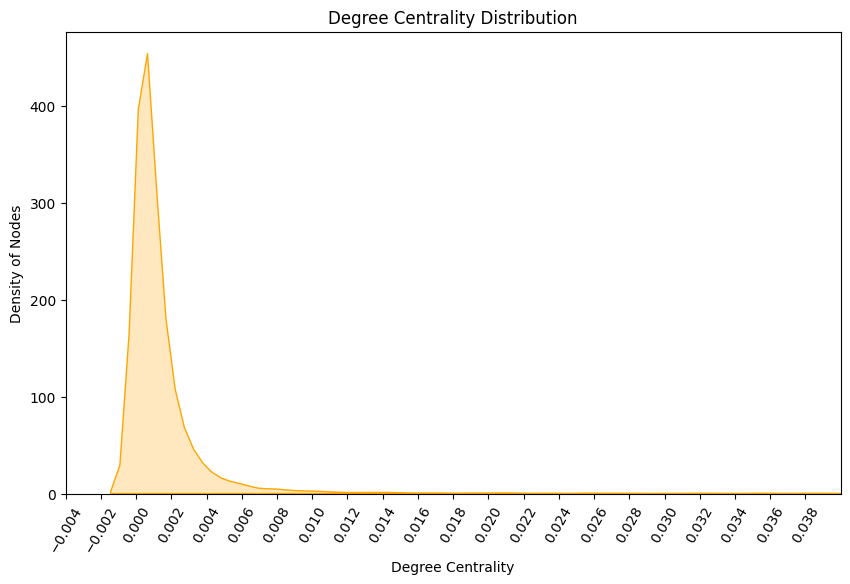

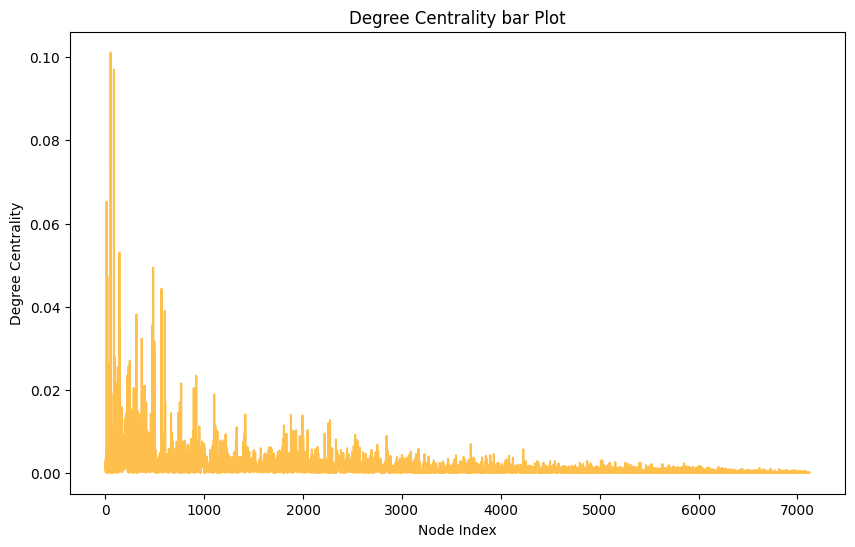

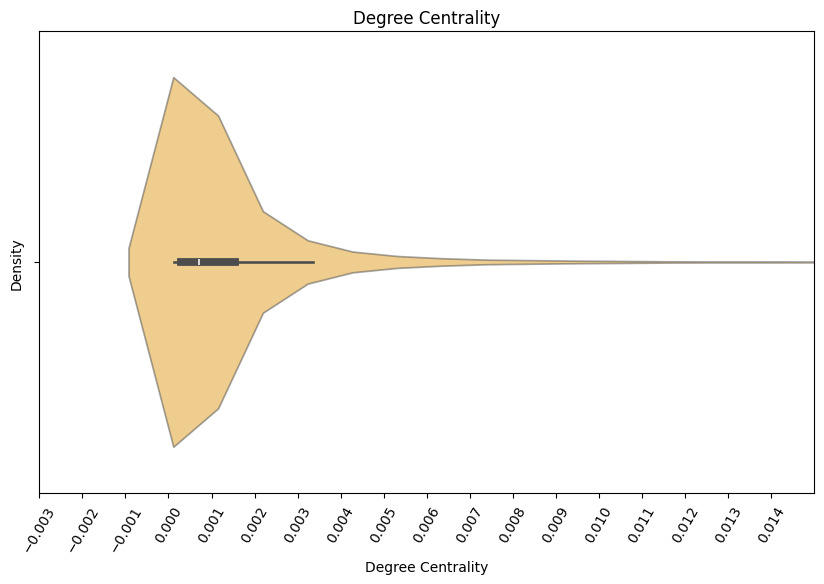

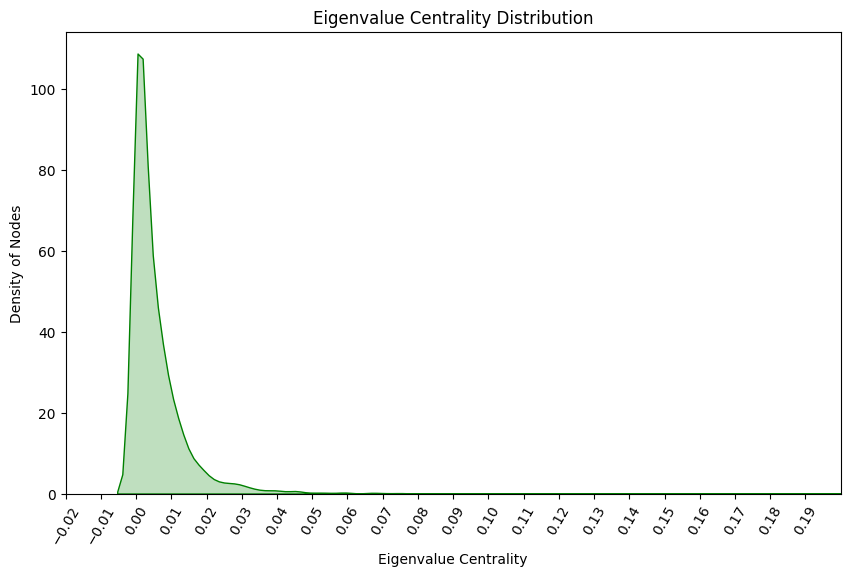

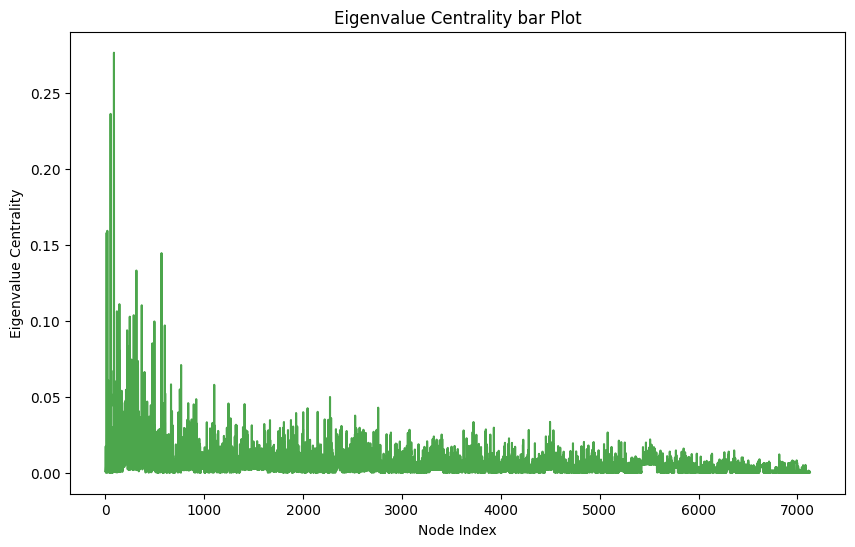

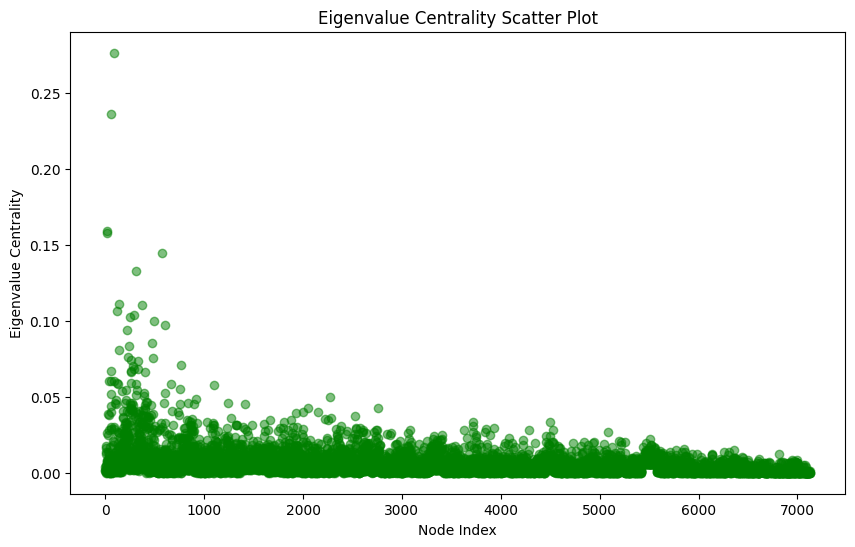

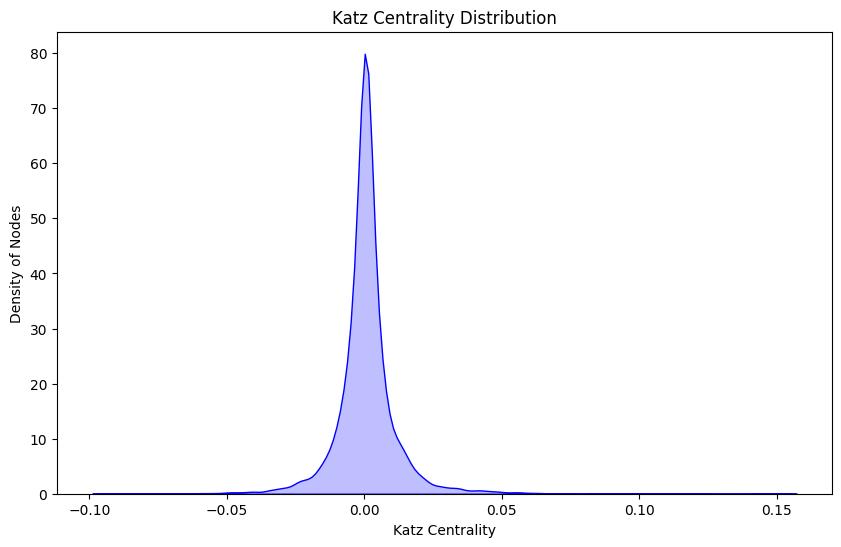

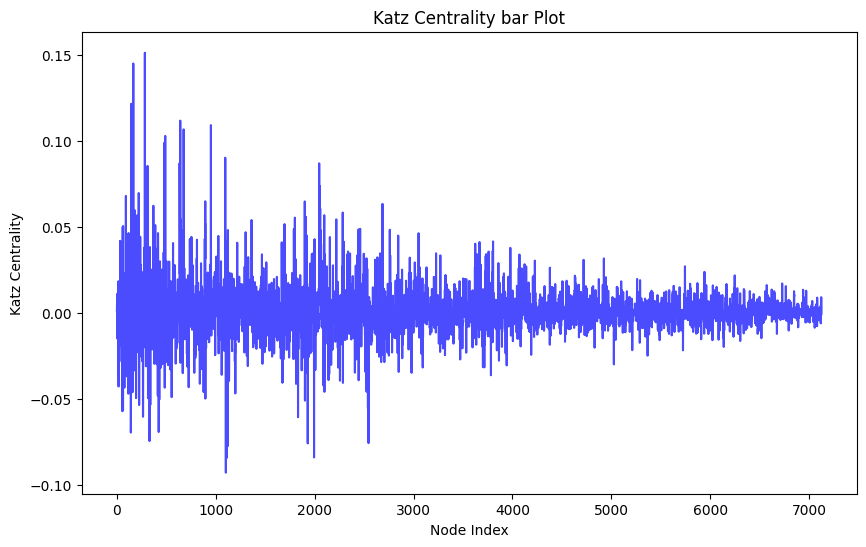

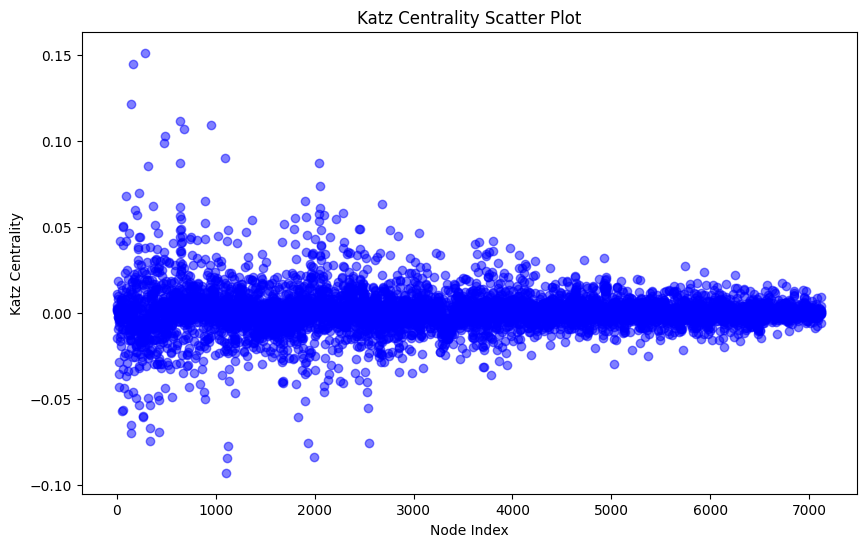

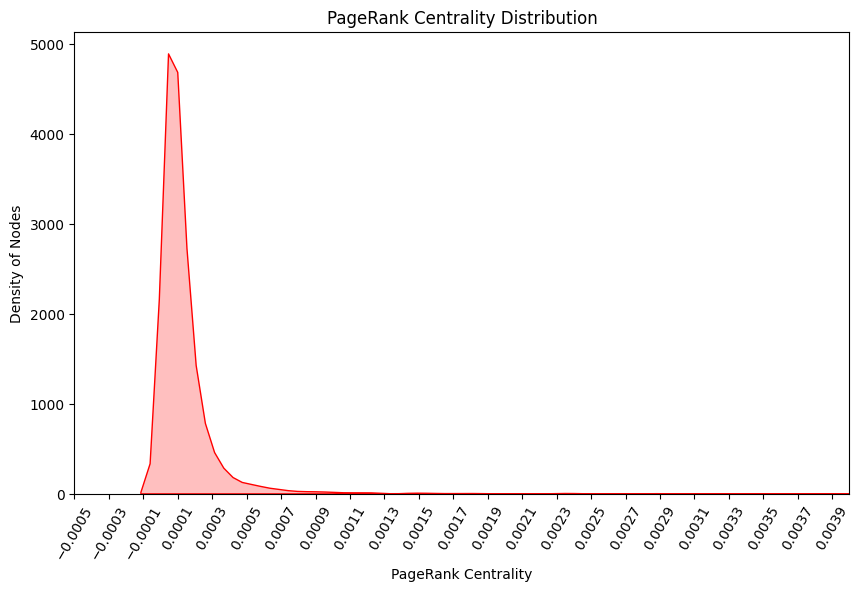

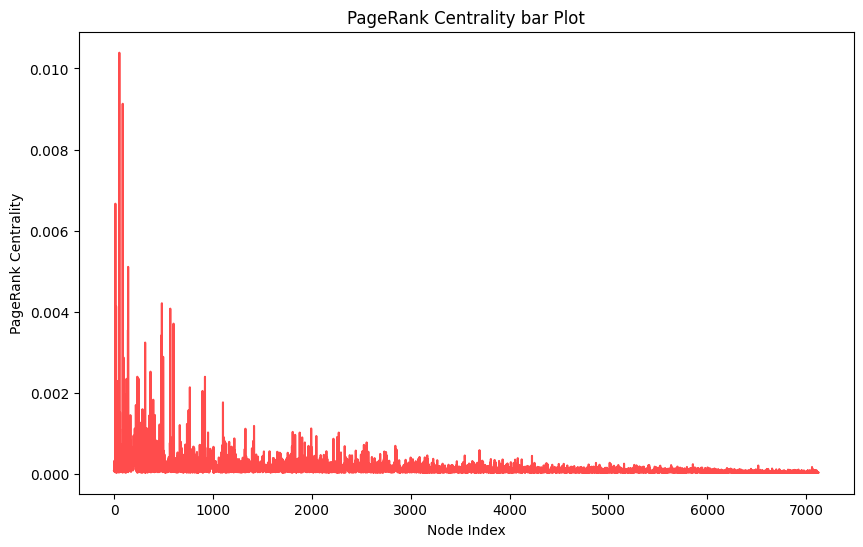

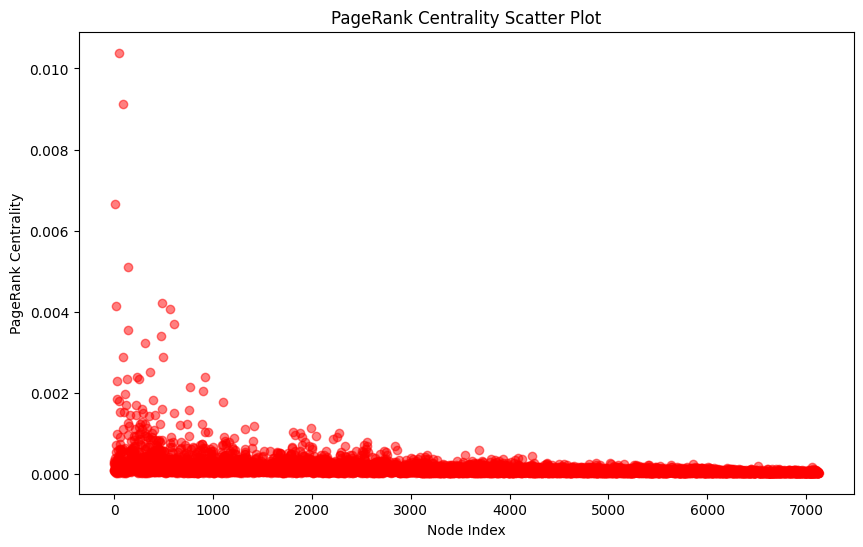

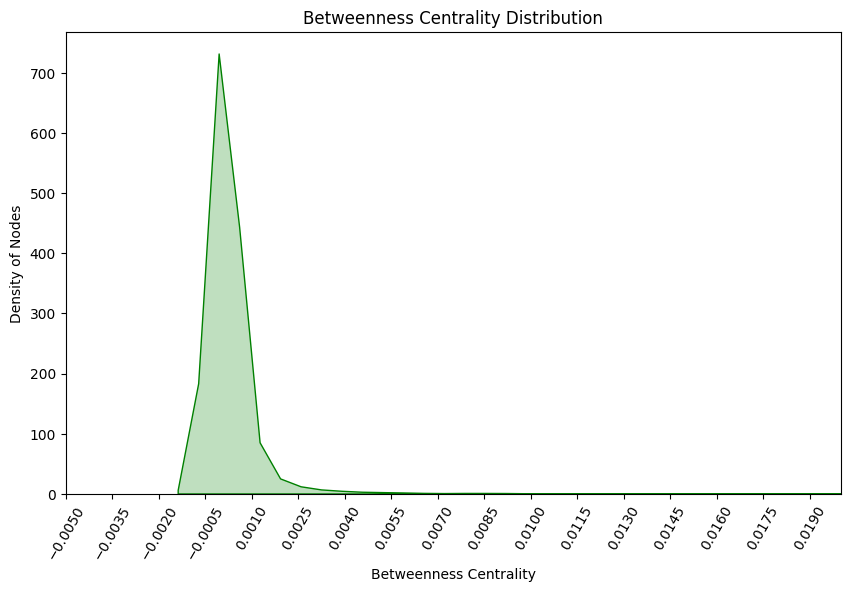

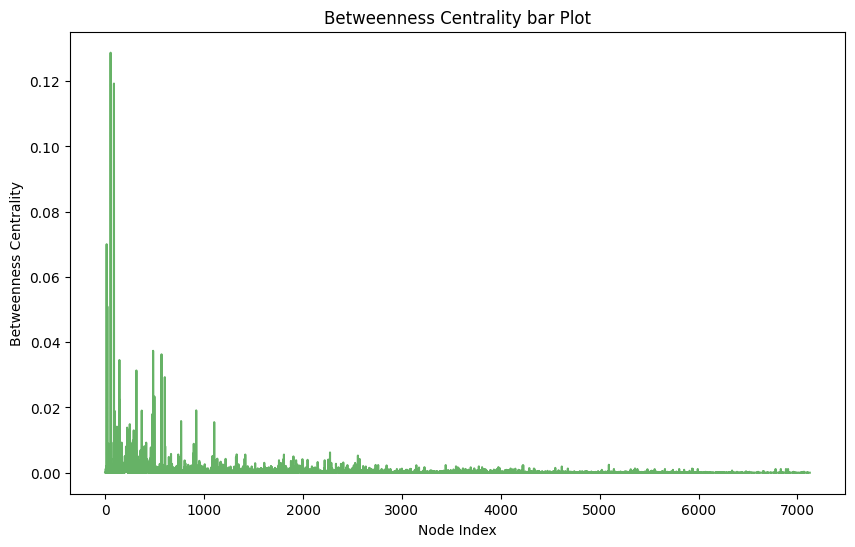

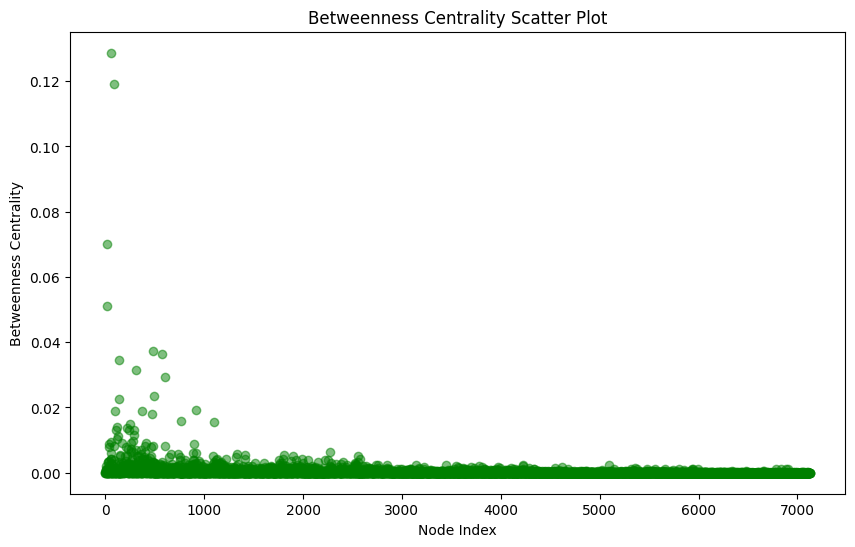

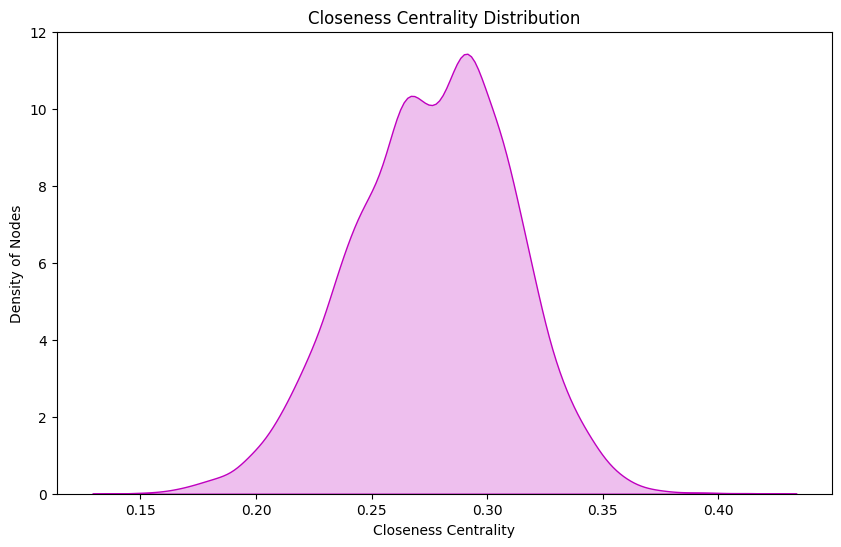

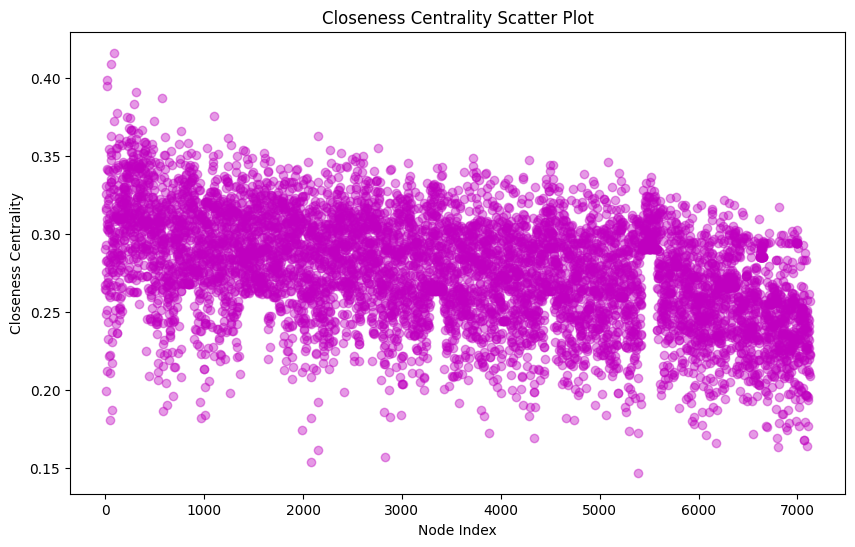

In [68]:
centrality_measures_twitch=calculate_all_centrality_measures(G)

In [69]:
def local_clustering_coefficient(G):
    # Clustering coefficient
    clustering_coefficient = nx.clustering(G)
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(list(clustering_coefficient.values()), fill=True,color='red')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Density of Nodes')
    plt.title('Clustering Coefficient Distribution')
    plt.show()

    return clustering_coefficient

In [70]:
def avg_local_clustering_coefficient(G):
    #  Average local Clustering Coefficient
    avg_local_clustering = nx.average_clustering(G)
    print('Average local Clustering Coefficient of the network =', avg_local_clustering)
    return avg_local_clustering

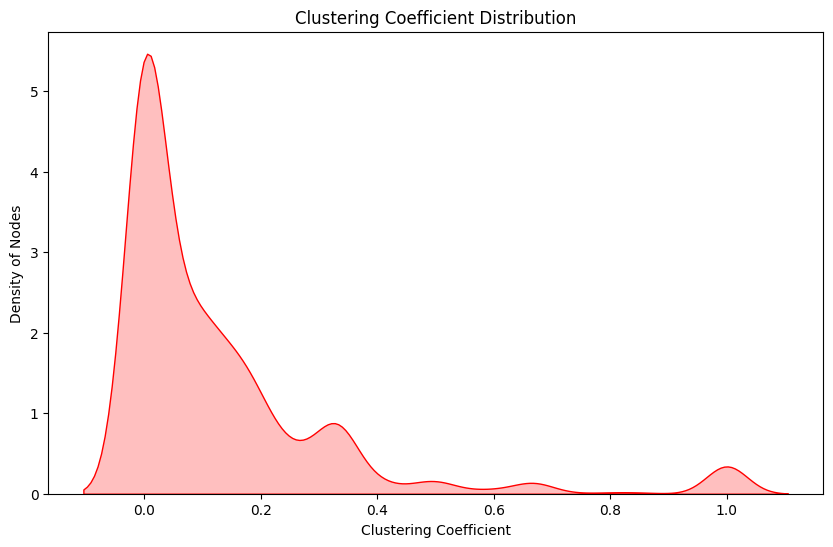

Average local Clustering Coefficient of the network = 0.1309282190147198


In [71]:
local_cluster_coeff = local_clustering_coefficient(G)
avg_local_cluster_coeff = avg_local_clustering_coefficient(G)

In [72]:
# Reciprocity
def repricocity(G):
    reciprocity = nx.reciprocity(G)
    print("Reciprocity:", reciprocity)

In [73]:
# Transitivity
def transitivity(G):
    transitivity = nx.transitivity(G)
    print("Transitivity:", transitivity)

In [74]:
repricocity(G) #HERE IT IS NOT DEFINED SINCE THE NETWORK IS UNDIRECTED
transitivity(G)

Reciprocity: 0.0
Transitivity: 0.04243324947984254


In [75]:
def sorted_centrality_top_10(centrality_measures):
    degree_centrality = centrality_measures['degree_centrality']
    eigen_centrality = centrality_measures['eigen_centrality']
    katz_centrality = centrality_measures['katz_centrality']
    pagerank_centrality = centrality_measures['pagerank_centrality']
    betweenness_centrality = centrality_measures['betweenness_centrality']
    closeness_centrality = centrality_measures['closeness_centrality']
    #print(degree_centrality)

    # Create pandas DataFrames
    df_degree = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
    df_betweenness = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])
    df_closeness = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
    df_eigenvector = pd.DataFrame(eigen_centrality.items(), columns=['Node', 'Eigenvector Centrality'])
    df_katz = pd.DataFrame(katz_centrality.items(), columns=['Node', 'Katz Centrality'])
    df_pagerank = pd.DataFrame(pagerank_centrality.items(), columns=['Node', 'PageRank Centrality'])

    #Creating a single df having info of all the above dfs
    df1_nodes = pd.concat([df_degree, df_eigenvector, df_katz, df_pagerank, df_betweenness, df_closeness,], axis=1, join = 'inner')
    df1_nodes = df1_nodes.loc[:, ~df1_nodes.columns.duplicated(keep='first')]

    # Sort DataFrames by centrality values
    df_degree = df_degree.sort_values(by='Degree Centrality', ascending=False).head(10)
    df_betweenness = df_betweenness.sort_values(by='Betweenness Centrality', ascending=False).head(10)
    df_closeness = df_closeness.sort_values(by='Closeness Centrality', ascending=False).head(10)
    df_eigenvector = df_eigenvector.sort_values(by='Eigenvector Centrality', ascending=False).head(10)
    df_katz = df_katz.sort_values(by='Katz Centrality', ascending=False).head(10)
    df_pagerank = df_pagerank.sort_values(by='PageRank Centrality', ascending=False).head(10)

    # Display top 10 centralities in a table
    print("Top 10 Degree Centralities:")
    print(df_degree)
    print("\nTop 10 Betweenness Centralities:")
    print(df_betweenness)
    print("\nTop 10 Closeness Centralities:")
    print(df_closeness)
    print("\nTop 10 Eigenvector Centralities:")
    print(df_eigenvector)
    print("\nTop 10 Katz Centralities:")
    print(df_katz)
    print("\nTop 10 PageRank Centralities:")
    print(df_pagerank) 

    return df1_nodes

In [76]:
df1_nodes = sorted_centrality_top_10(centrality_measures_twitch)

Top 10 Degree Centralities:
     Node  Degree Centrality
54   1773           0.101053
88   4949           0.096982
14   3401           0.065263
143  6136           0.053053
484   166           0.049404
21   5842           0.047158
569  1924           0.044351
602  2732           0.039018
315  2447           0.038175
477  1103           0.035649

Top 10 Betweenness Centralities:
     Node  Betweenness Centrality
54   1773                0.128715
88   4949                0.119261
14   3401                0.070026
21   5842                0.050943
484   166                0.037366
569  1924                0.036284
143  6136                0.034541
315  2447                0.031330
602  2732                0.029282
497  4016                0.023363

Top 10 Closeness Centralities:
      Node  Closeness Centrality
88    4949              0.416350
54    1773              0.408872
14    3401              0.398579
21    5842              0.395262
315   2447              0.391118
569   1924     

In [77]:
df1_nodes.head()

,Node,Degree Centrality,Eigenvector Centrality,Katz Centrality,PageRank Centrality,Betweenness Centrality,Closeness Centrality
0,6194,0.000842,0.001036,0.001113,0.000095,0.000025,0.267314
1,255,0.000842,0.001663,0.004239,0.000102,0.000058,0.264457
2,980,0.002526,0.003863,0.002095,0.000238,0.000199,0.290059
3,2992,0.000561,0.004121,0.001731,0.000068,0.000041,0.282368
4,2507,0.003088,0.016286,-0.014957,0.000273,0.000965,0.325774


<Axes: >

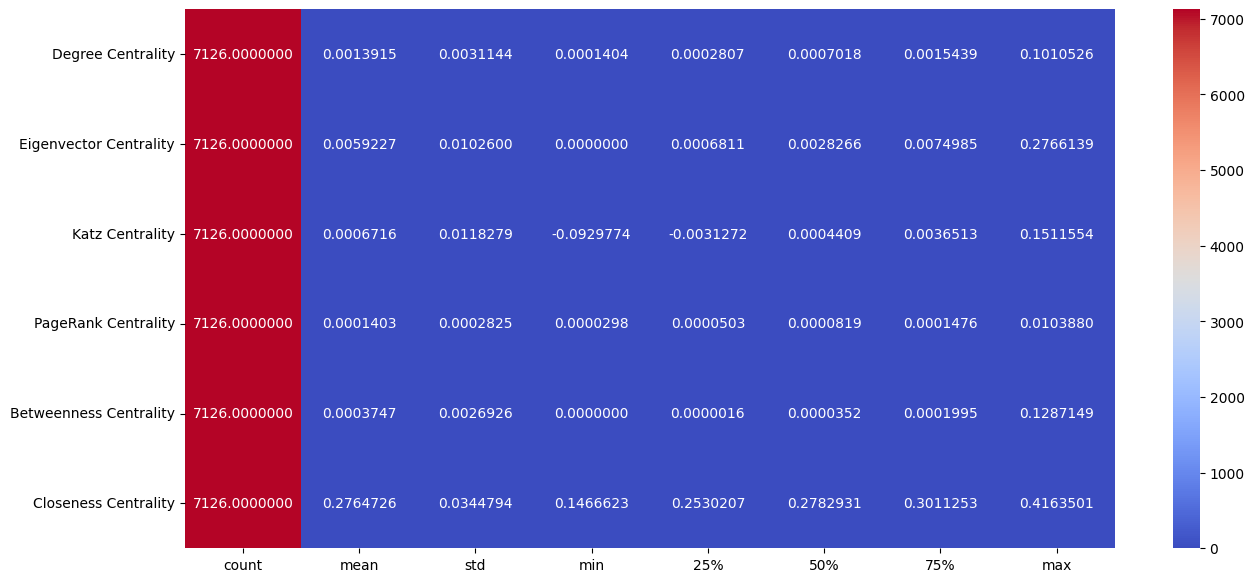

In [78]:
des1 = df1_nodes.drop('Node', axis=1).describe().T
plt.figure(figsize = (15, 7))
sns.heatmap(des1, annot=True, cmap = 'coolwarm', fmt=".7f")

In [79]:
def sorted_local_clustering_top10(G):
    clustering_coefficient = nx.clustering(G)
    # Create pandas DataFrames
    df_clustering = pd.DataFrame(clustering_coefficient.items(), columns=['Node', 'Clustering Coefficient'])

    # Sort DataFrames by clustering coefficient values
    df_clustering = df_clustering.sort_values(by='Clustering Coefficient', ascending=False).head(10)

    # Display top 10 clustering coefficients in a table
    print("Top 10 Clustering Coefficients:")
    print(df_clustering)

In [80]:
sorted_local_clustering_top10(G)

Top 10 Clustering Coefficients:
      Node  Clustering Coefficient
3875  3632                     1.0
6466  5861                     1.0
3641  2211                     1.0
3640   604                     1.0
3023   740                     1.0
1007   116                     1.0
3039  4550                     1.0
6947  3693                     1.0
4534  6875                     1.0
6740  5488                     1.0


LastFM Asia Social Network

In [81]:
df2 = pd.read_csv('./lastfm_asia_edges.csv')
df2.head()

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


In [82]:
G1 = nx.from_pandas_edgelist(df2, source='node_1', target='node_2', create_using=nx.Graph())

In [83]:
#If the below code runs in your laptop then do please get the pic of the graph
# nx.draw(G1)

In [84]:
print('Total no. of edges =', G1.number_of_edges())
print('Total no. of nodes =', G1.number_of_nodes())

Total no. of edges = 27806
Total no. of nodes = 7624


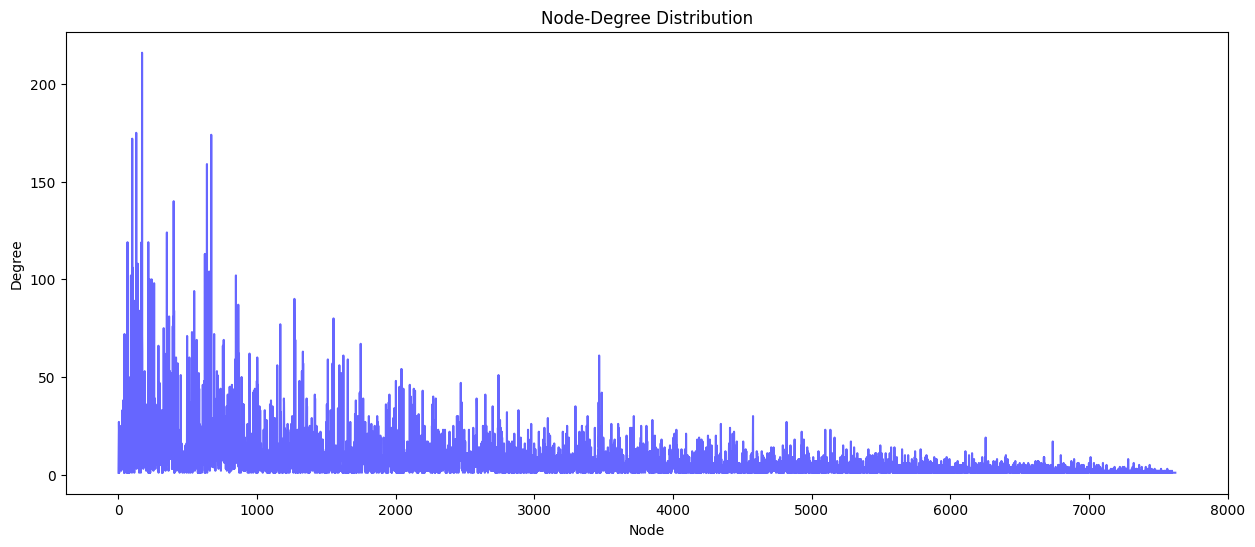

In [85]:
degrees = [G1.degree(node) for node in G1.nodes()]
plt.figure(figsize=(15, 6))
plt.plot(degrees, color = 'b', alpha = 0.6)
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Node-Degree Distribution")
plt.show()

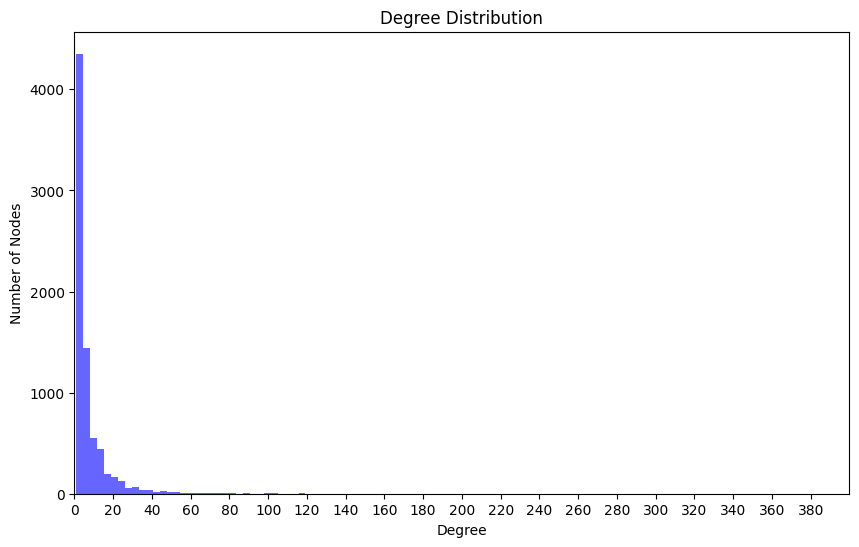

Max Degree: 216
Min Degree: 1
Average Degree: 7.2943336831059815
Standard Deviation of Degree Distribution: 11.499118968116877


In [86]:
plot_degree_distribution(G1)

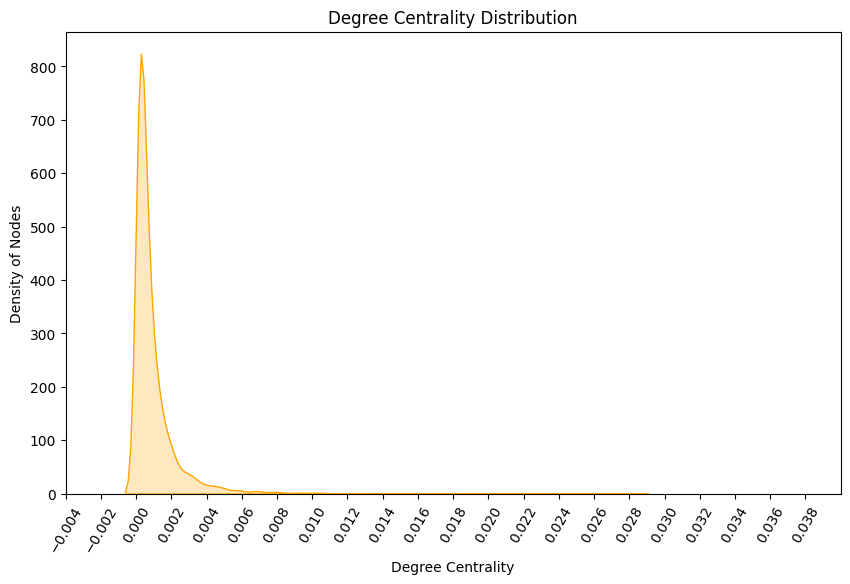

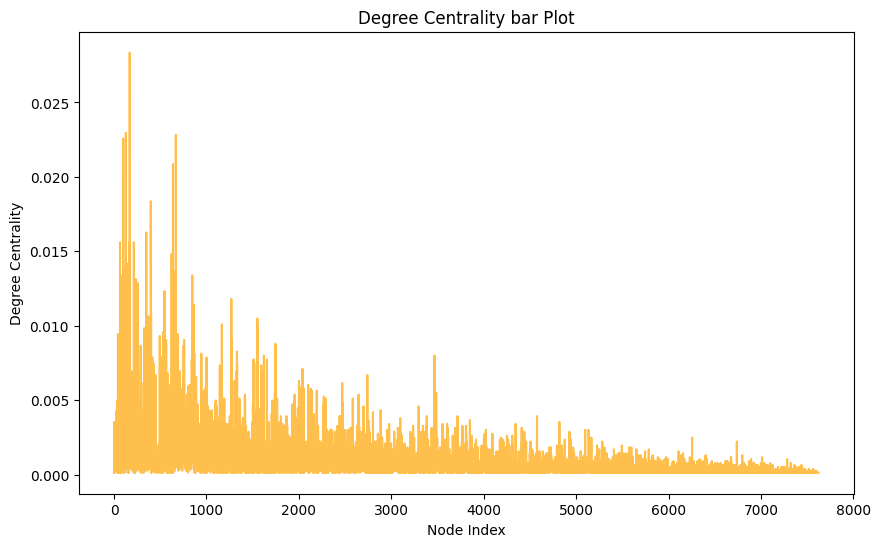

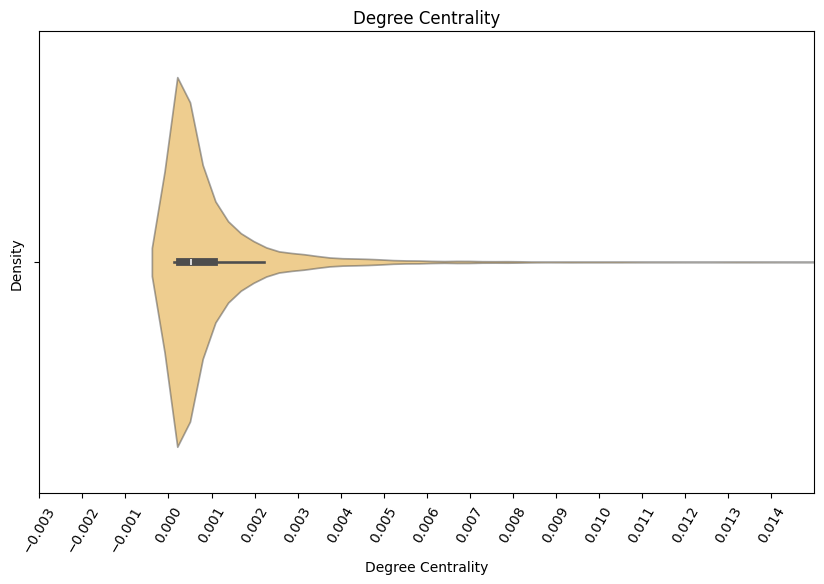

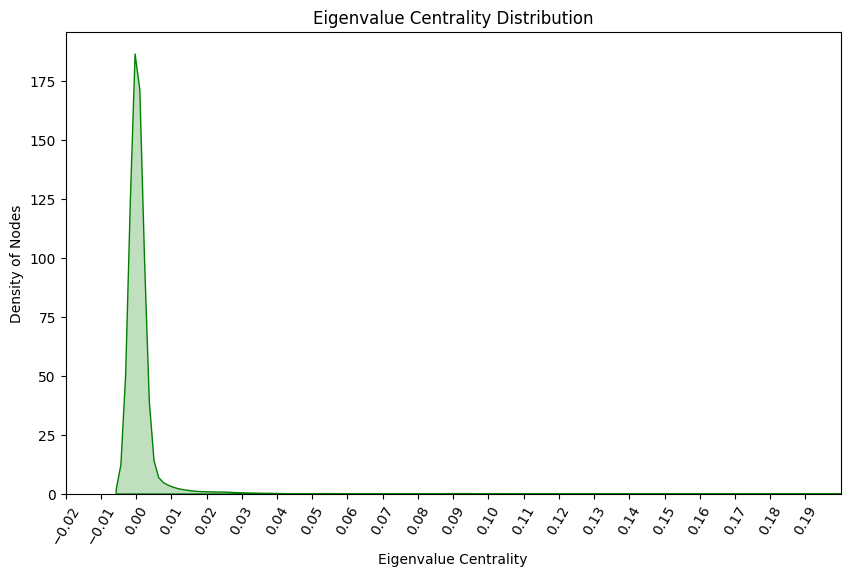

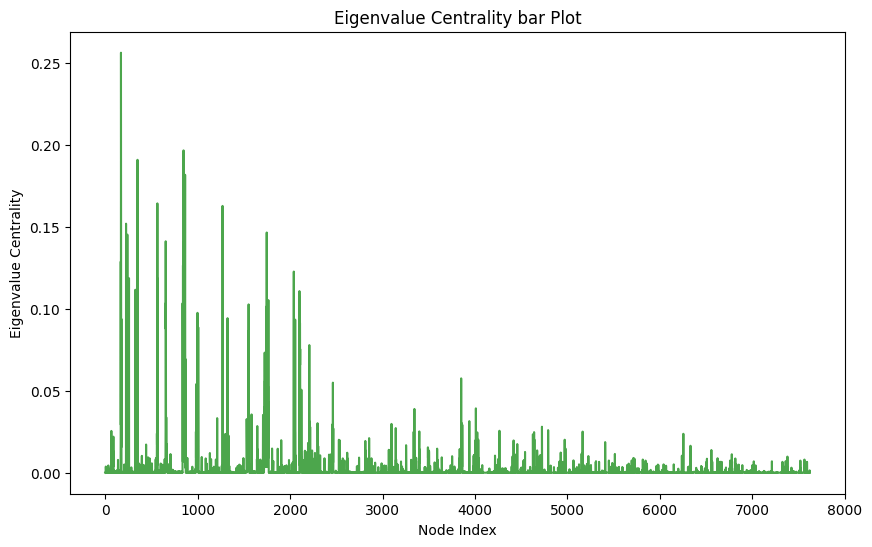

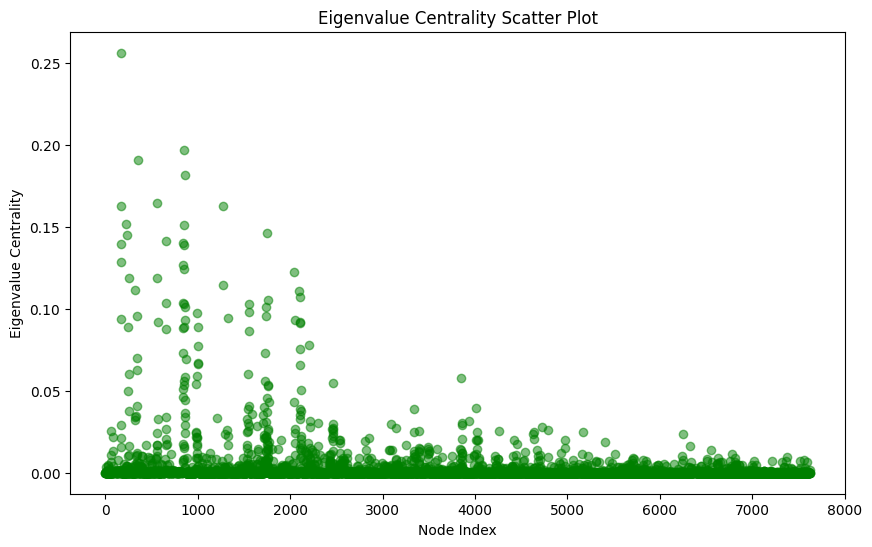

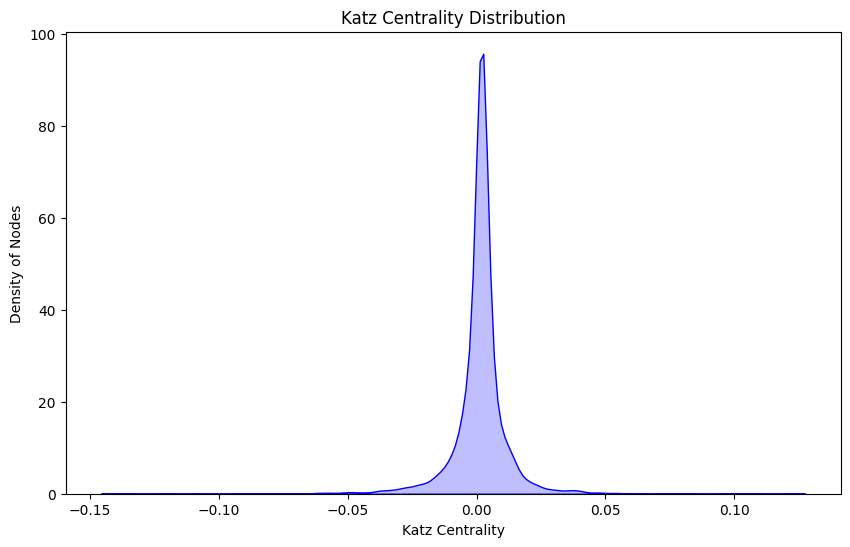

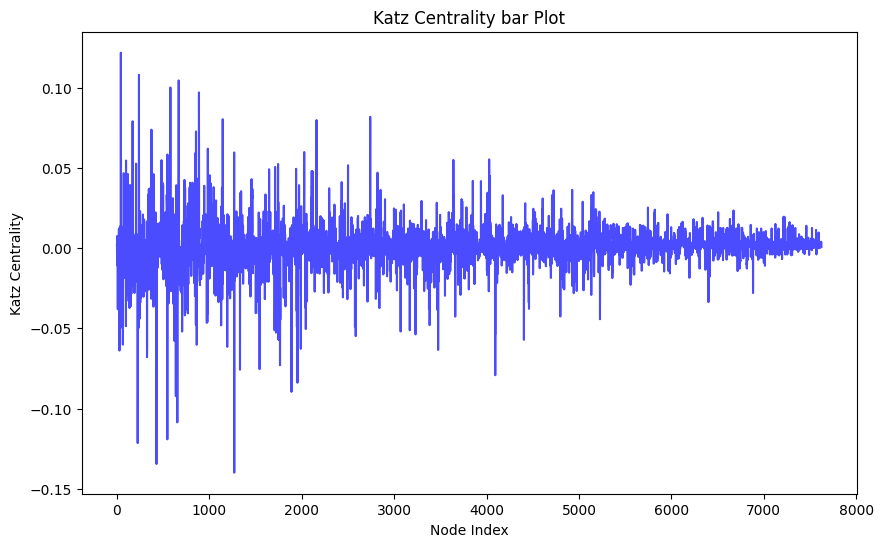

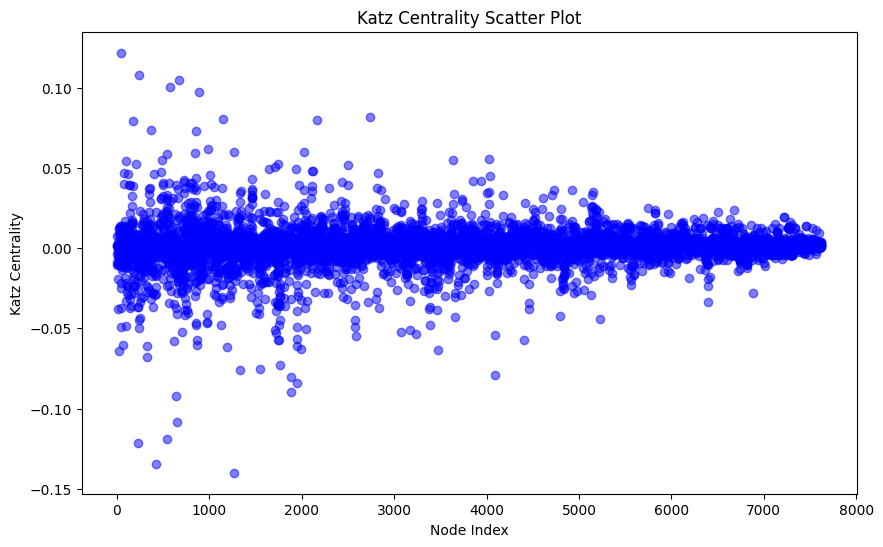

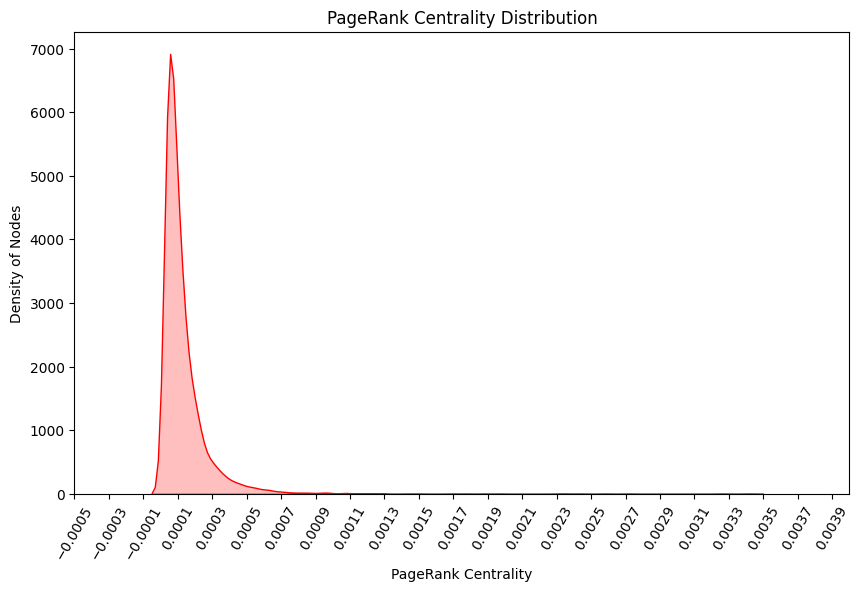

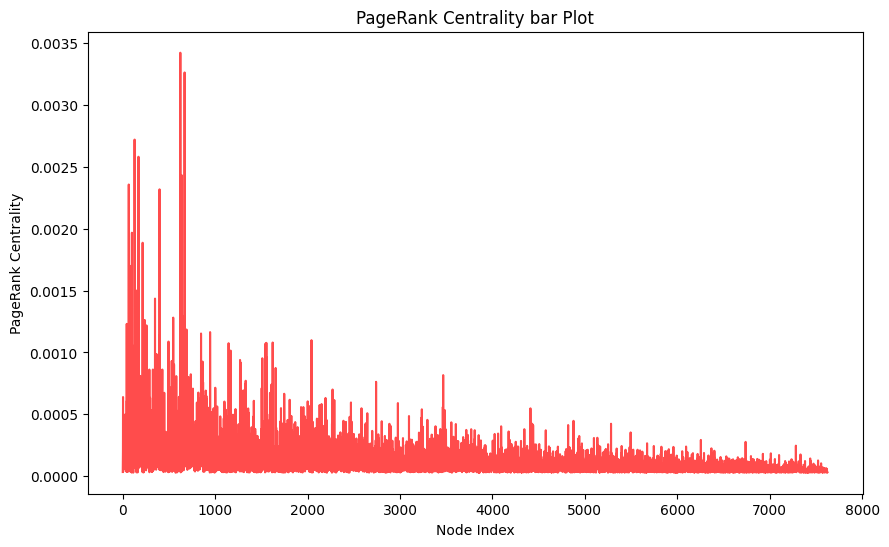

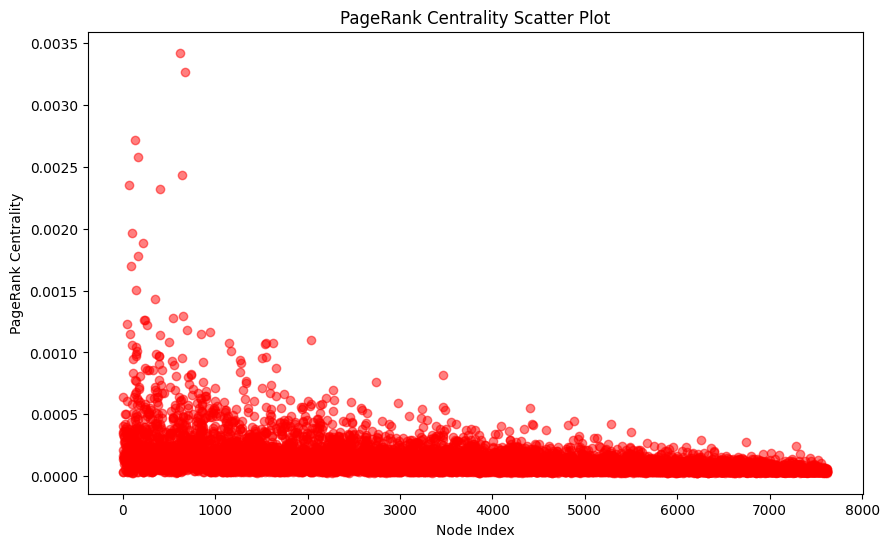

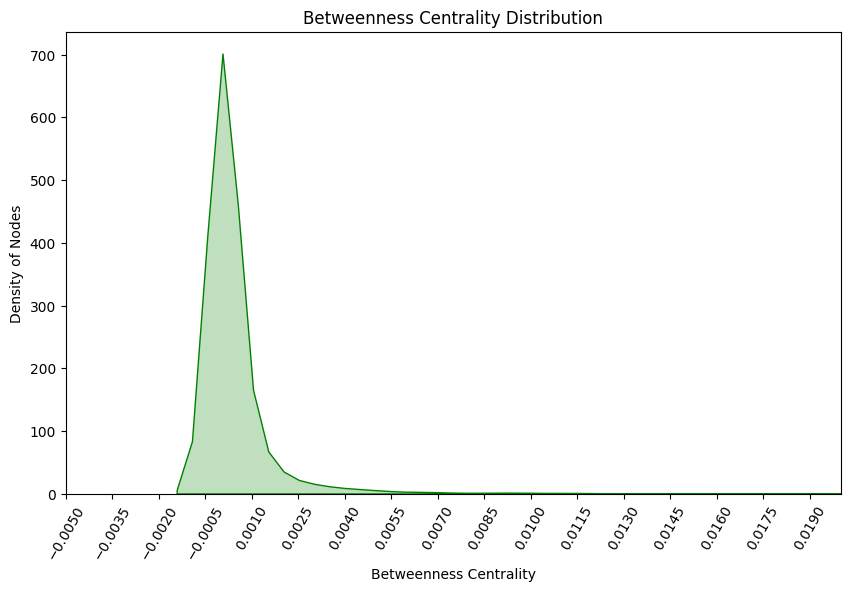

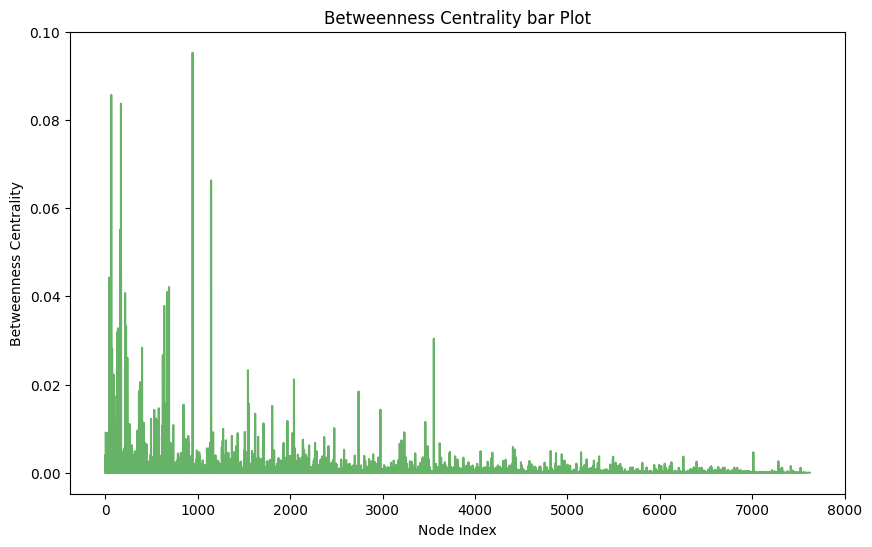

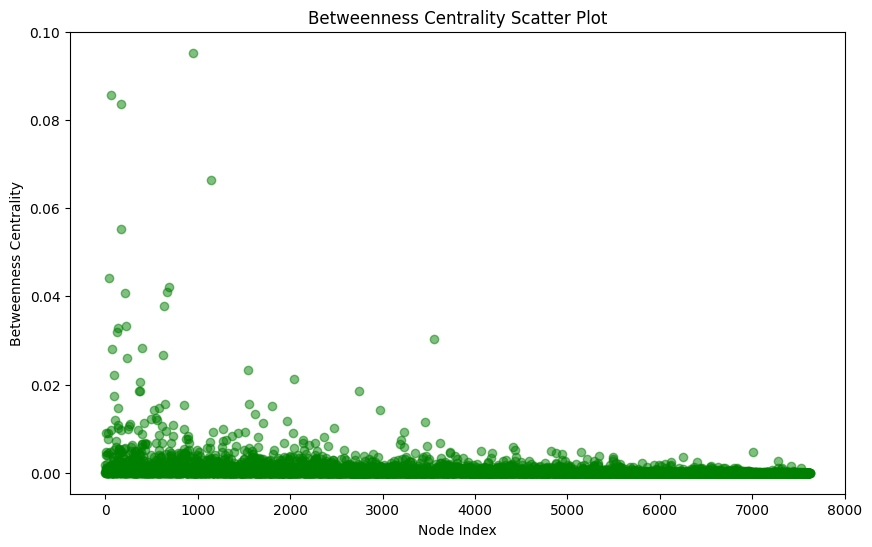

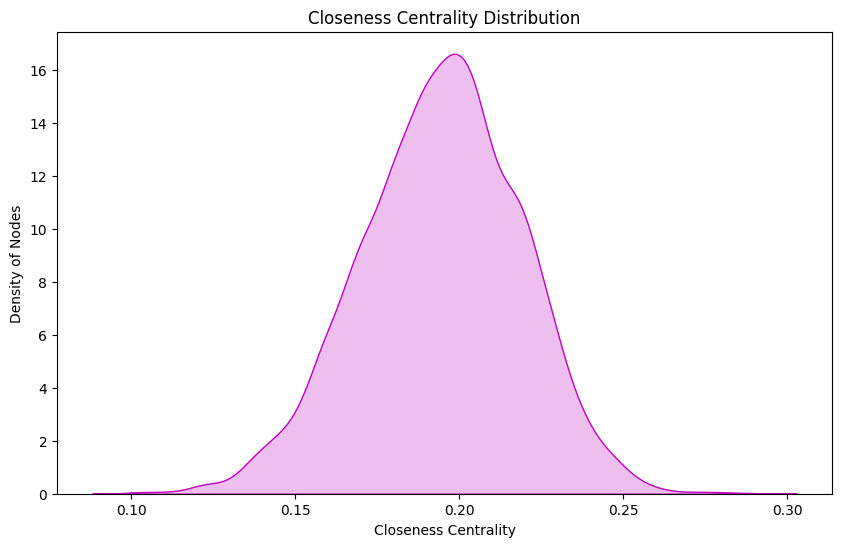

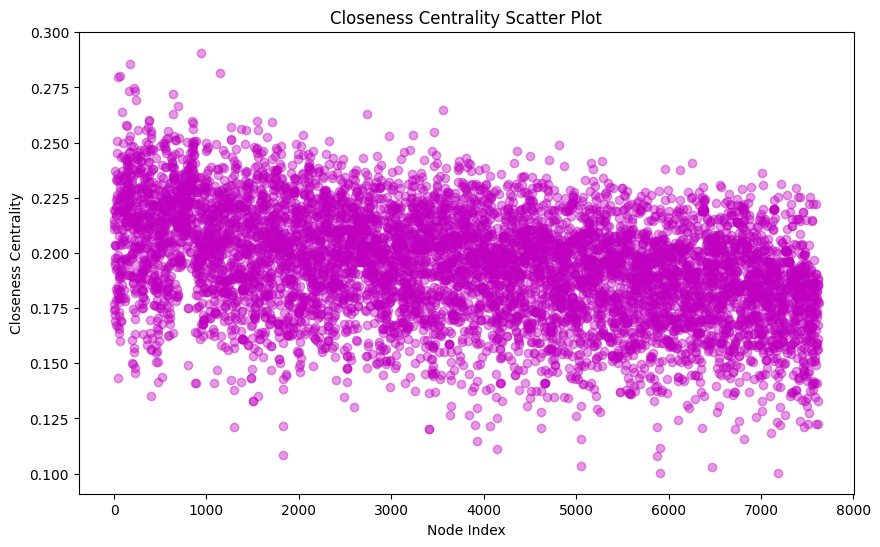

In [87]:
centrality_measures_lastFM = calculate_all_centrality_measures(G1)

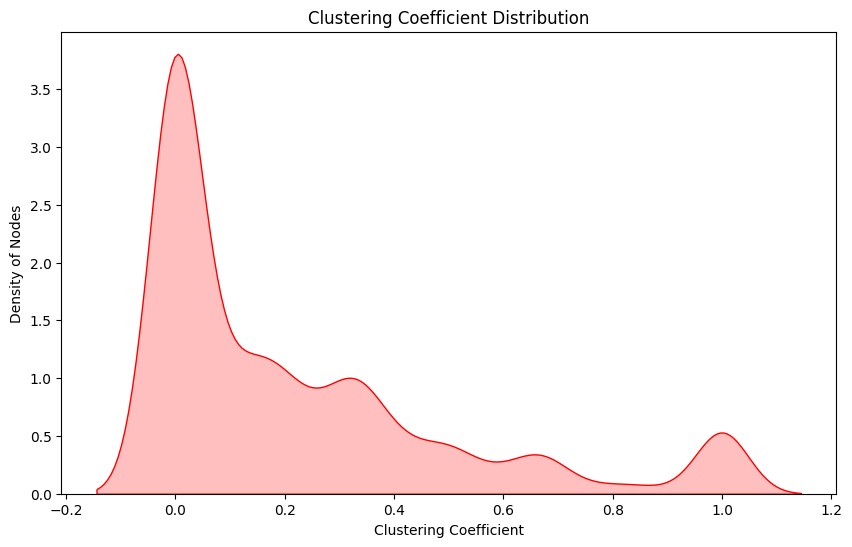

Average local Clustering Coefficient of the network = 0.219418424327086


In [88]:
local_cluster_coeff = local_clustering_coefficient(G1)
avg_local_cluster_coeff = avg_local_clustering_coefficient(G1)

In [89]:
repricocity(G1) #HERE IT IS NOT DEFINED SINCE THE NETWORK IS UNDIRECTED
transitivity(G1)

Reciprocity: 0.0
Transitivity: 0.178622548153384


In [90]:
df2_nodes = sorted_centrality_top_10(centrality_measures_lastFM)

Top 10 Degree Centralities:
     Node  Degree Centrality
170  7237           0.028335
128  3530           0.022957
669  4785           0.022826
99    524           0.022563
638  3450           0.020858
398  2510           0.018365
349  3597           0.016267
166  6101           0.015611
215  5127           0.015611
65   2854           0.015611

Top 10 Betweenness Centralities:
      Node  Betweenness Centrality
945   7199                0.095238
65    2854                0.085667
170   7237                0.083701
1145  4356                0.066271
166   6101                0.055228
43    5454                0.044244
690   4338                0.042115
669   4785                0.040987
215   5127                0.040746
638   3450                0.037827

Top 10 Closeness Centralities:
      Node  Closeness Centrality
945   7199              0.290710
170   7237              0.285677
1145  4356              0.281603
65    2854              0.280350
43    5454              0.279825
215 

In [91]:
df2_nodes.head()

,Node,Degree Centrality,Eigenvector Centrality,Katz Centrality,PageRank Centrality,Betweenness Centrality,Closeness Centrality
0,0,0.000131,0.000002,0.001949,0.000034,0.000000,0.176929
1,747,0.001049,0.000062,0.001377,0.000135,0.000248,0.214956
2,1,0.001312,0.000131,-0.003880,0.000212,0.001850,0.210621
3,4257,0.003542,0.000044,-0.008615,0.000640,0.004048,0.219525
4,2194,0.003017,0.000422,0.007636,0.000339,0.001056,0.213249


<Axes: >

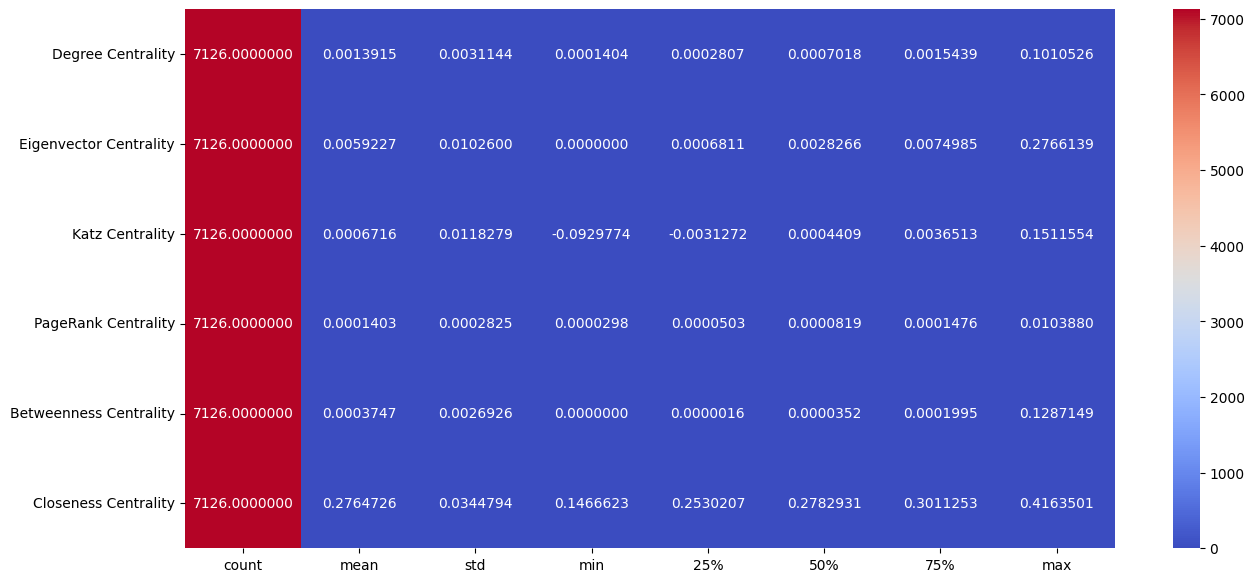

In [92]:
des2 = df1_nodes.drop('Node', axis=1).describe().T
plt.figure(figsize = (15, 7))
sns.heatmap(des2, annot=True, cmap = 'coolwarm', fmt=".7f")

In [93]:
sorted_local_clustering_top10(G1)

Top 10 Clustering Coefficients:
      Node  Clustering Coefficient
5909  7229                     1.0
2526  5298                     1.0
2518  1923                     1.0
6487  3017                     1.0
1153  2735                     1.0
4972  5101                     1.0
2520  6694                     1.0
2521  3479                     1.0
4976  6997                     1.0
3701   890                     1.0
